# Gradient Descent and Dymanic Programming

## Gradient Descent

$ loss= {1\over n} \sum_{i=1}^n |y_i - \hat{y_i}| $ $$$$
$
\frac{\partial}{\partial k}loss(k,b)=
\begin{cases}
{1\over n} \sum_{i=1}^n x_i, & y_i < \hat{y_i} \\
{1\over n} \sum_{i=1}^n -x_i, & y_i >= \hat{y_i}
\end{cases}
$ $$$$
$\frac{\partial}{\partial b}loss(k,b)=
\begin{cases}
1, & y_i < \hat{y_i} \\
-1, & y_i >= \hat{y_i}
\end{cases}
$
#### Iteration process:
$k:=k-\alpha\frac{\partial}{\partial k}loss(k,b) $ $$$$
$b:=b-\alpha\frac{\partial}{\partial b}loss(k,b) $

In [1]:
# Loss函数
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

# 求导数
def gradient_loss(x, y, k, b):
    x_list = list(x)
    y_list = list(y)
    k_sum = 0
    b_sum = 0
    size = len(x_list)
    for i in range(size):
        if y_list[i] < k * x_list[i] + b:
            k_sum += x_list[i]
            b_sum += 1
        else:
            k_sum -= x_list[i]
            b_sum -= 1
    partial_k = k_sum / size
    partial_b = b_sum / size
    return partial_k, partial_b 

# 梯度下降
def gradient_descent(x, y, k, b, LR):
    partial_k, partial_b = gradient_loss(x, y, k, b)
    return k - LR * partial_k, b - LR * partial_b

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [3]:
X = load_boston()['data'][:, 5]
y = load_boston()['target']

nums:1000, k:4.464970933992123, b:4.912694071146363, loss:11.53
nums:2000, k:3.9807237889328757, b:4.832491304347964, loss:9.12
nums:3000, k:3.583795682213552, b:4.764862450593078, loss:7.49
nums:4000, k:3.267655111067364, b:4.709293675889524, loss:6.46
nums:5000, k:3.038153461265021, b:4.667509486166214, loss:5.90
nums:6000, k:2.9031779782610867, b:4.640905533597048, loss:5.71
nums:7000, k:2.832518088142543, b:4.6246272727275, loss:5.65
nums:8000, k:2.7988563332018543, b:4.614337944663943, loss:5.64
nums:9000, k:2.780343307114808, b:4.606546245059632, loss:5.64
nums:10000, k:2.7682301616602247, b:4.5998328063248275, loss:5.63
nums:11000, k:2.765541648616775, b:4.594634387352785, loss:5.63
nums:12000, k:2.7658295932808876, b:4.589891304349096, loss:5.63
nums:13000, k:2.766117537945, b:4.585148221345407, loss:5.63
nums:14000, k:2.7664054826091125, b:4.580405138341718, loss:5.63
nums:15000, k:2.766693427273225, b:4.57566205533803, loss:5.63
nums:16000, k:2.7669813719373373, b:4.570918972

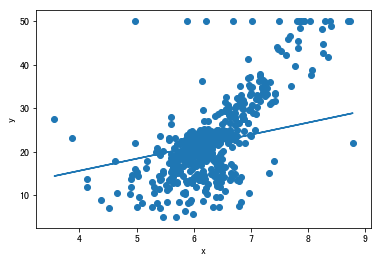

In [4]:
# learning rate
LR = 0.0001
# init k，b
k = b = 5
best_k = best_b = float('inf')
min_loss = float('inf')
# iterate count
nums = 1
while nums < 20000:
    k, b = gradient_descent(X, y, k, b, LR)
    y_sd = k * X + b
    loss_val = loss(y_sd, y)
    if nums % 1000 == 0:
        print('nums:{}, k:{}, b:{}, loss:{:.2f}'.format(nums, k, b, loss_val))
    if loss_val < min_loss:
        min_loss = loss_val
        best_k, best_b = k, b
    nums += 1
y_pre = best_k * X + best_b
plt.plot(X, y_pre)
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Edit-Distance
    
    假设字符串S和T的长度分别为m和n, 两者的编辑距离表示为edit[m][n]
    1、当S和T的末尾字符相等时，编辑距离应等于前一状态的值，即：edit[m][n] = edit[m-1][n-1]
    2、当S和T的末尾字符不相等时：
      a.删除S的末尾字符后，二者相等，edit[m][n] = edit[m-1][n] + 1
      b.删除T的末尾字符后，二者相等，edit[m][n] = edit[m][n-1] + 1
      c.在S的末尾添加T的末尾字符后，S的长度为m+1，此时S与T的最优一个字符确定相等了，相当于现在只需确定S[m]与T[n-1]即可，edit[m][n] = edit[m][n-1] + 1
      d.在T的末尾添加S的末尾字符后，同上，edit[m][n] = edit[m-1][n] + 1
      e.把S的末尾字符修改成与T末尾字符相等，edit[m][n] = edit[m-1][n-1] + 1
      e.当S为空时，edit[0][n]=n
      f.当T为空时，edit[m][0]=m
      
      动态规划方程：
$
edit[i][j]=
\begin{cases}
0, & i=j=0 \\
i, & 0<i<m,j=0\\
j, & i=0,0<j<n\\
min(edit[m-1][n] + 1,edit[m][n-1] + 1,edit[m-1][n-1]+flag), & 0<i<m,0<j<n
\end{cases}
$
$
flag=
\begin{cases}
0, & S[i]==T[j] \\
1, & S[i]!=T[j]
\end{cases}
$

In [5]:
from collections import defaultdict
from functools import wraps

In [6]:
called_times = defaultdict(int)
def get_called_times(f):
    '''@param f is a function'''
    @wraps(f)
    def warp(*n):
        result = f(*n)
        called_times[f.__name__+'('+str(n)+')'] += 1
        return result
    # return a inner function
    return warp

#### 计算编辑距离

In [7]:
@get_called_times
def edit_distance(s, t):
    if len(s) == 0: return len(t)
    if len(t) == 0: return len(s)
    candidates = []
    if s[-1] == t[-1]:
        candidates += [(edit_distance(s[:-1], t[-1]), '')]
    else:
        computing = [(edit_distance(s[:-1], t) + 1, 'DEL {}'.format(s[-1])),
                     (edit_distance(s, t[:-1]) + 1, 'ADD {}'.format(t[-1])),
                     (edit_distance(s[:-1], t[:-1]) + 1, 'SUB {}=>{}'.format(s[-1], t[-1]))
                    ]
        candidates += computing
    min_distance, operation = min(candidates, key=lambda x:x[0])
    return min_distance

In [8]:
edit_distance('sailn','failing')

4

In [9]:
called_times

defaultdict(int,
            {"edit_distance(('', 'failing'))": 1,
             "edit_distance(('', 'failin'))": 9,
             "edit_distance(('', 'faili'))": 32,
             "edit_distance(('', 'fail'))": 70,
             "edit_distance(('', 'fai'))": 118,
             "edit_distance(('', 'fa'))": 158,
             "edit_distance(('', 'f'))": 172,
             "edit_distance(('s', ''))": 126,
             "edit_distance(('', ''))": 113,
             "edit_distance(('s', 'f'))": 86,
             "edit_distance(('s', 'fa'))": 86,
             "edit_distance(('s', 'fai'))": 72,
             "edit_distance(('s', 'fail'))": 46,
             "edit_distance(('s', 'faili'))": 24,
             "edit_distance(('s', 'failin'))": 8,
             "edit_distance(('s', 'failing'))": 1,
             "edit_distance(('', 'a'))": 14,
             "edit_distance(('s', 'a'))": 14,
             "edit_distance(('sa', 'fa'))": 14,
             "edit_distance(('sa', 'fai'))": 14,
             "edit_distanc

#### 增加缓存

In [10]:
called_times.clear()
# 记录具体的变化过程
solution = {}
# 缓存已计算过的结果
cache = {}
@get_called_times
def edit_distance_cache(s, t):
    # 查询是否已计算过了，计算过了直接返回存储的值
    if (s, t) in cache: return cache[(s, t)]
    if len(s) == 0:
        # 插入缓存
        cache[(s, t)] = len(t)
        return len(t)
    if len(t) == 0: 
        # 插入缓存
        cache[(s, t)] = len(s)
        return len(s)
    candidates = []
    # 表示两字符相等情况
    if s[-1] == t[-1]:
        candidates += [(edit_distance_cache(s[:-1], t[:-1]), '')]
    else:
        # 不相等的几种情况
        computing = [(edit_distance_cache(s[:-1], t) + 1, 'DEL {}'.format(s[-1])),
                     (edit_distance_cache(s, t[:-1]) + 1, 'ADD {}'.format(t[-1])),
                     (edit_distance_cache(s[:-1], t[:-1]) + 1, 'SUB {}=>{}'.format(s[-1], t[-1]))
                    ]
        candidates += computing
    # 根据编辑距离排序，取出最小的值
    min_distance, operation = min(candidates, key=lambda x: x[0])
    solution[(s, t)] = operation
    cache[(s, t)] = min_distance
    return min_distance

In [11]:
edit_distance_cache('ABCDE', 'ABCCEF')

2

In [12]:
called_times

defaultdict(int,
            {"edit_distance_cache(('', 'ABCCEF'))": 1,
             "edit_distance_cache(('', 'ABCCE'))": 2,
             "edit_distance_cache(('', 'ABCC'))": 2,
             "edit_distance_cache(('', 'ABC'))": 2,
             "edit_distance_cache(('', 'AB'))": 2,
             "edit_distance_cache(('', ''))": 1,
             "edit_distance_cache(('A', 'A'))": 3,
             "edit_distance_cache(('', 'A'))": 1,
             "edit_distance_cache(('A', 'AB'))": 2,
             "edit_distance_cache(('A', 'ABC'))": 3,
             "edit_distance_cache(('A', 'ABCC'))": 3,
             "edit_distance_cache(('A', 'ABCCE'))": 3,
             "edit_distance_cache(('A', 'ABCCEF'))": 1,
             "edit_distance_cache(('AB', 'AB'))": 3,
             "edit_distance_cache(('AB', 'ABC'))": 2,
             "edit_distance_cache(('AB', 'ABCC'))": 2,
             "edit_distance_cache(('AB', 'ABCCE'))": 3,
             "edit_distance_cache(('AB', 'ABCCEF'))": 1,
             "edit_dist

In [13]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'ABCC'): '',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABC', 'ABC'): '',
 ('AB', 'A'): 'DEL B',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D=>C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

## Questions

### Review machine learning
    
    1. Why do we use Derivative / Gredient to fit a target function?¶
    Ans: Because Derivative or Gredient reflects the rate of change of the function.

    2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶
    Ans: The Gredient is the derivative of a function at some point. The descent is the direction along which the gradient decreases.

    3. What's the advantages of the 3rd gradient descent method compared to the previous methods?
    Ans: This method can get the optimal solution quickly.

    4. Using the simple words to describe: What's the machine leanring.¶
    Ans: Machine learning is a complicated function that represents the relationship between input data and output data.

### Answer following questions:

    1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
    Ans: It can avoid repeated computation. There is a correlation between its previous and the current result.
    
    2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?
    Ans: Dynamic Programming is a method. The optimal solution of the global problem depends on the optimal solution of each sub-problem.
    
    3. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
    Ans: The optimal solution of the global problem depends on the optimal solution of each sub-problem.
    
    4. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)
    Ans: It can get the global optimal solution and improve the efficiency of solution by utilizing practical knowledge and experience.
    

## Finish the k-person-salesman problem (optional)

In [14]:
import random
import matplotlib.pylab as plt
import time
import numpy as np

In [15]:
''' 随机生成 k 个站点 '''
k = 8
rand_range = 100
latitudes = [random.randint(-rand_range, rand_range) for _ in range(k)]
longitude = [random.randint(-rand_range, rand_range) for _ in range(k)]

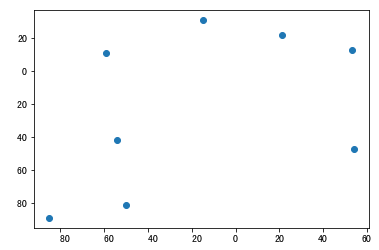

In [16]:
plt.scatter(latitudes, longitude)
plt.show()

#### 给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

In [17]:
''' 出发地 '''
chosen_p1 = (-50, 10)
# chosen_p2 = (1, 30)
# chosen_p3 = (99, 15)

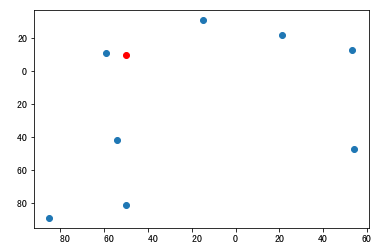

In [18]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.show()

In [19]:
''' 所有站点集合 '''
positions = [(latitudes[i], longitude[i]) for i in range(len(latitudes))]
positions.insert(0, chosen_p1)

In [20]:
''' 计算两地之间的距离 '''
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [21]:
''' 根据地点索引计算每两地之间的距离，并存放在 distance_arr 中 '''
def get_distance_arr(positions):
    size = len(positions)
    # 初始化
    distance_arr = [[0. for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            # 计算并填充
            distance_arr[i][j] = distance(positions[i], positions[j])
    return distance_arr

In [22]:
''' 距离矩阵 '''
distance_arr = get_distance_arr(positions)

In [23]:
''' 计算路线的总路程 '''
def path_distance(path):
    '''path: 路径的索引'''
    if len(path) < 2: return 0
    all_distance = 0
    for i in range(1, len(path)):
        all_distance += distance_arr[path[i]][path[i-1]]
    return all_distance

In [24]:
def print_result_info(path_in):
    print("该方法的最短路程为：{}".format(path_distance(path)))
    _positions , x, y = [], [], []
    for ele in path_in:
        _positions.append(positions[ele])
        x.append(positions[ele][0])
        y.append(positions[ele][1])
    print(_positions)
    plt.scatter(x, y)
    plt.scatter(x[0], y[0], color='r')
    plt.plot(x, y)
    plt.show()

#### 暴力搜索

    遍历所有可达路径，再选取一条路程最短的路径

In [25]:
'''首先获取所有可达的路径，再选取路程最短的一条'''
def short_path1(positions):
    size = len(positions)
    paths = []
    arrays = [i for i in range(size)]
    def means(path, arr):
        if not arr: 
            paths.append(path + [path[0]])
        for i in range(len(arr)):
            means(path + [arr[i]], arr[:i] + arr[i+1:])
    means([arrays[0]], arrays[1:])
    paths = sorted(paths, key=lambda x:path_distance(x))
    return paths[0]

In [26]:
# 运行结果
start = time.time()
path = short_path1(positions)
end = time.time()
print("暴力方法的执行时间为:", end-start)
print("暴力方法的最优路径为:", path)

暴力方法的执行时间为: 0.24435091018676758
暴力方法的最优路径为: [0, 3, 2, 7, 5, 4, 1, 6, 8, 0]


该方法的最短路程为：435.0872327971263
[(-50, 10), (-15, 31), (21, 22), (53, 13), (54, -47), (-50, -81), (-85, -89), (-54, -42), (-59, 11), (-50, 10)]


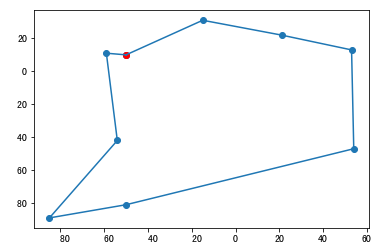

In [27]:
print_result_info(path)

    小结：暴力搜索的方式虽然能得到全局最优解，但是效率极低。

#### 贪心算法

    从初始位置开始，每次都获取距离自己最近且没有被访问过得点作为下一个点，直到全部遍历完成。

In [28]:
def short_path2(positions):
    size = len(positions)
    path = [0]
    current = 0
    while True:
        current = near_node(current, path)
        if current == -1: break
        path.append(current)
    path.append(0)
    return path

# 选择下一个最近的点
def near_node(cur, path):
    min_dis = float('inf')
    res = -1
    for i in range(len(positions)):
        if i in path or distance_arr[cur][i] == 0: continue
        if distance_arr[cur][i] < min_dis: 
            res = i
            min_dis = distance_arr[cur][i]
    return res

In [29]:
start = time.time()
path = short_path2(positions)
end = time.time()
print("贪心算法的执行时间为:", end-start)
print("贪心算法的最优路径为:",path)

贪心算法的执行时间为: 9.107589721679688e-05
贪心算法的最优路径为: [0, 8, 3, 2, 7, 5, 6, 4, 1, 0]


该方法的最短路程为：475.97307099059014
[(-50, 10), (-59, 11), (-15, 31), (21, 22), (53, 13), (54, -47), (-54, -42), (-50, -81), (-85, -89), (-50, 10)]


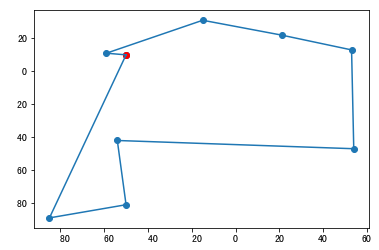

In [30]:
print_result_info(path)

    小结：贪心算法效率高，速度快，但是并不能得到全局最优解

#### 动态规划

    假设现有0、1、2、3这4个城市，求从0城市出发经过1、2、3城市后再回到0城市得最短路程。
    
    分析：(0,{1,2,3}表示从0出发，经过{1、2、3}，再回到0。
    
                                        (0,{1,2,3})
                                       /     |     \
                              (1,{2,3})  (2,{1,3})  (3,{1,2})
                              /  \          /   \        /   \
                        (2,{3})(3,{2}) (1,{3})(3,{1}) (1,{2})(2,{1})   
                           |       |      |      |       |       |
                        (3,{})  (2,{})  (3,{}) (1,{}) (2,{})  (1,{})
                           +      +       +      +       +       +
                       d[3][0] d[2][0] d[3][0] d[1][0] d[2][0] d[1][0]
    动规方程：
    
    short_path(init, s) = min(short_path(i, s.remove(i)) + distance[i][init])
    

In [31]:
# 创建位置列表【0,1,2,3,4,5,6,7,...】
pos_indexs = [i for i in range(len(positions))]
def short_path3(start_index, pos_indexs):
    ''' 
    param1: 当前位置出发
    param2: 等待要走的位置
    
    '''
    # 如果剩下要走的位置为空，相当于走完了所有的站点，此时返回当前位置到最初时刻位置的距离
    if not pos_indexs: return [0], distance_arr[start_index][0]
    # 主要是用来存储当前这个位置 start_index 后面路径得到最短的路程
    inf_dis = float('inf')
    # 最短路程下走过的最短路径
    res_indexs = []
    # 遍历接下来的站点
    for i in range(len(pos_indexs)):
        # 每次循环时，要从集合中取出当前位置，返回的是最短路径和最短的路程
        indexs, dis = short_path3(pos_indexs[i], pos_indexs[:i] + pos_indexs[i+1:])
        dis += distance_arr[pos_indexs[i]][start_index]
        if dis < inf_dis:
            res_indexs = indexs + pos_indexs[i:i+1] 
            inf_dis = dis
    return res_indexs, inf_dis    

In [32]:
start_time = time.time()
path, distance = short_path3(pos_indexs[0], pos_indexs[1:])
path += [path[0]]
end_time = time.time()
print(path)
print("动态规划的执行时间为:", end_time-start_time)
print("动态规划的最优路径为:",path)

[0, 3, 2, 7, 5, 4, 1, 6, 8, 0]
动态规划的执行时间为: 0.13170886039733887
动态规划的最优路径为: [0, 3, 2, 7, 5, 4, 1, 6, 8, 0]


该方法的最短路程为：435.0872327971263
[(-50, 10), (-15, 31), (21, 22), (53, 13), (54, -47), (-50, -81), (-85, -89), (-54, -42), (-59, 11), (-50, 10)]


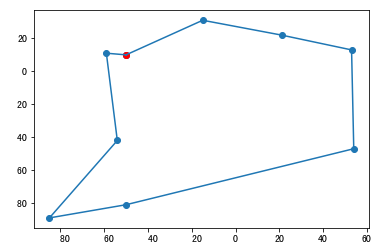

In [33]:
print_result_info(path)

#### 动态规划提升

In [40]:
import pandas as pd
import numpy as np
import math
import time

point_list = [(x, y) for x, y in zip(latitudes, longitude)]
point_list.insert(0, chosen_p1)
point_array = np.array(point_list)

# 距离矩阵
dist = np.zeros((point_array.shape[0], point_array.shape[0]))
for i in range(point_array.shape[0]):
    for j in range(point_array.shape[0]):
        dist[i, j] = math.sqrt(np.sum((point_array[i, :] - point_array[j, :]) ** 2))
        
"""
N:计数
s:二进制表示，遍历过得城市对应位为0，未遍历为1
dp:动态规划的距离数组
dist：目的地间距离矩阵
sumpath:目前的最小路径总长度
Dtemp：当前最小距离
path:记录下一个应该到达的城市
"""

N = point_array.shape[0]
path = np.ones((2 ** N -1, N), dtype=np.int)
dp = np.ones((2 ** N - 1, N)) * -1

# 代码的核心
def TSP(s, init):
    if dp[s][init] != -1:
        return dp[s][init]
    
    if s == 0: # 成立代表遍历结束
        return dist[0][init]
    
    sumpath = float('inf')

    for i in range(N):
        if s & (1 << i): # 判断是否遍历过，未遍历则执行
            m = TSP(s & (~ (1 << i)), i) + dist[i][init]#s & (~ (1 << i))让遍历过的点的相应位置变0
            if m < sumpath:
                sumpath = m
                path[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]

init_point = 0
s = 0
for i in range(1, N):
    s = s|(1<<i)

start = time.time()
distance = TSP(s, init_point)
end = time.time()

for i in range(1, N):
    s = s|(1<<i)
init = 0
num = 0
print("最优路程：", distance)
route = [0]

while True:
    route.append(init)
    init = path[s][init]
    s = s & (~ (1 << init))
    num += 1
    if num > N-2:
        break
print("程序的运行时间是：%s" % (end - start))

最优路程： 435.0872327971263
程序的运行时间是：0.011272907257080078
